In [188]:
import torch
import matplotlib.pyplot as plt
from helpers import *

%reload_ext autoreload
%autoreload 2

In [2]:
# How to create a floating point tensor
theta = torch.tensor([1, 2], dtype=torch.float32, requires_grad=True)
print(theta)

tensor([1., 2.], requires_grad=True)


In [3]:
theta2 = torch.tensor([1, 2], dtype=torch.float32)
theta2.requires_grad

False

$L(\theta) = \theta_0^2 + \theta_1^2$

In [4]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
A.shape

torch.Size([2, 2])

In [5]:
# A quadratic function
Fun = theta[0]**2 + theta[1]**2 + theta2[0]**3 
print(Fun)

tensor(6., grad_fn=<AddBackward0>)


In [6]:
# Take the gradient of loss with respect to theta
Fun.backward()
print(theta.grad)

tensor([2., 4.])


<AxesSubplot: >

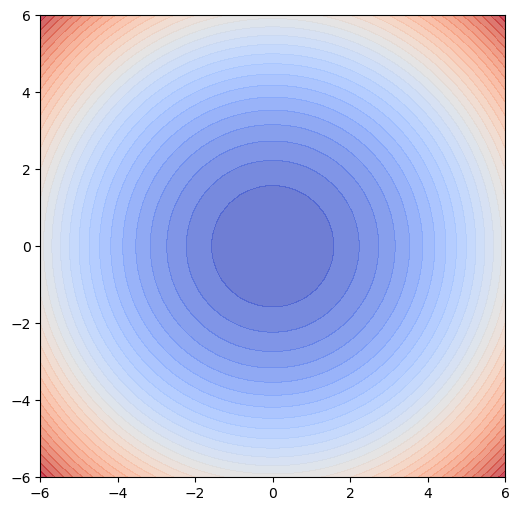

In [7]:
# Let's redefine the loss as a function of theta
def loss(theta):
    return theta[0]**2 + theta[1]**2

plot_contours(loss, (-6, 6), (-6, 6), levels = 30)

In [8]:
# How to extract the value of a scalar tensor
loss(theta).item()

5.0

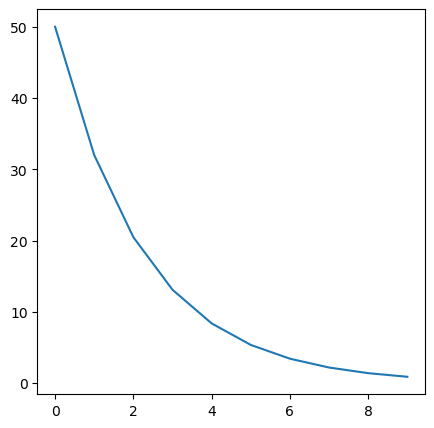

In [9]:
# Basic Gradient Descent
import torch

theta = torch.tensor([5., 5.], requires_grad=True)

lr = .1
n_steps = 10
loss_hist = np.zeros(n_steps)

for i in range(n_steps):
   curr_loss = loss(theta)

   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()

# plot the loss in loss_list
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(loss_hist)

In [205]:
# Keeping track of theta
import torch

theta = torch.tensor([-3., -1.], requires_grad=True)

lr = .1
n_steps = 50
loss_hist = np.zeros(n_steps)
theta_list = [theta.clone()]

for i in range(n_steps):
   curr_loss = loss(theta)
   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()
   theta_list.append(theta.clone())

theta_list[::5] # print every 5th theta

[tensor([-3., -1.], grad_fn=<CloneBackward0>),
 tensor([0.8459, 1.2766], grad_fn=<CloneBackward0>),
 tensor([1.1026, 2.1490], grad_fn=<CloneBackward0>),
 tensor([1.0699, 2.5674], grad_fn=<CloneBackward0>),
 tensor([1.0374, 2.7789], grad_fn=<CloneBackward0>),
 tensor([1.0193, 2.8869], grad_fn=<CloneBackward0>),
 tensor([1.0099, 2.9421], grad_fn=<CloneBackward0>),
 tensor([1.0051, 2.9704], grad_fn=<CloneBackward0>),
 tensor([1.0026, 2.9848], grad_fn=<CloneBackward0>),
 tensor([1.0013, 2.9922], grad_fn=<CloneBackward0>),
 tensor([1.0007, 2.9960], grad_fn=<CloneBackward0>)]

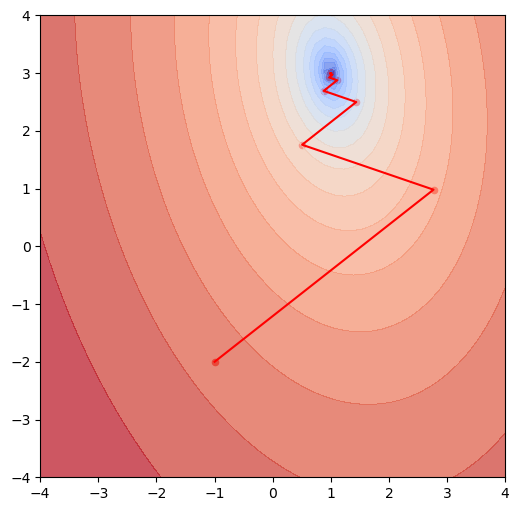

In [211]:
# Concatenate beta_list into a tensor of shape (n_steps+1, 2) and make into a numpy array
theta_tensor = torch.stack(theta_list).detach().numpy()

# Plot a scatter plot of the rows of beta_tensor
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(theta_tensor[:,0], theta_tensor[:,1], s=20, c='r')

# Add line scatter plot of the rows of beta_tensor
ax.plot(theta_tensor[:,0], theta_tensor[:,1], c='r')

# Plot the countours of the loss function
_, cnt = plot_contours(loss, (-4, 4), (-4, 4), ax, levels = 20)



# Linear regression by GD

In [137]:
# Set numpy random seed for reproducibility
np.random.seed(1337)

n_train = 20
# Create a random dataset of size n_train x 2, Gaussian entries
X = torch.randn(n_train, 2)
theta_tru = torch.tensor([1., 3.])

y = X @ theta_tru 

In [138]:
y[1], X[1,:]

(tensor(-4.4503), tensor([-3.1686, -0.4272]))

$L(\theta) = \frac1n \sum_{i=1}^n (X \theta - y)_i^2 = \frac1n \| X \theta - y\|^2$ 

In [207]:
# Define a quadratic loss function
def loss(theta):
    return torch.mean((X @ theta - y)**2)

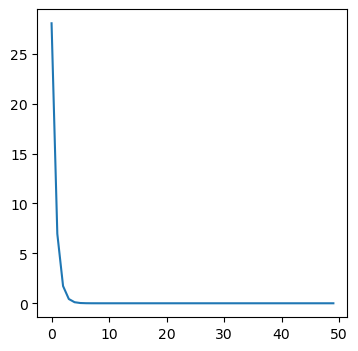

In [208]:
import torch

theta = torch.tensor([-1, -2.], requires_grad=True)

lr = .4
n_steps = 50
loss_hist = np.zeros(n_steps)
theta_list = [theta.clone()]

for i in range(n_steps):
   curr_loss = loss(theta)
   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()
   theta_list.append(theta.clone())

# plot the loss in loss_list
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(loss_hist)

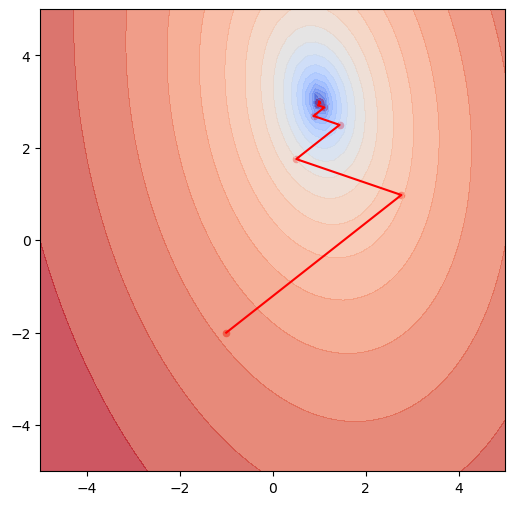

In [212]:
# Concatenate beta_list into a tensor of shape (n_steps+1, 2) and make into a numpy array
theta_tensor = torch.stack(theta_list).detach().numpy()

# Plot a scatter plot of the rows of beta_tensor
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(theta_tensor[:,0], theta_tensor[:,1], s=20, c='r')

# Add line scatter plot of the rows of beta_tensor
ax.plot(theta_tensor[:,0], theta_tensor[:,1], c='r')

# Plot the countours of the loss function
plot_contours(loss, (-5, 5), (-5, 5), ax, levels = 20);